In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.preprocessing import LabelEncoder , MinMaxScaler, StandardScaler

# EDA

In [3]:
data=pd.read_csv("C:\\Users\\Admin\\Desktop\\Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

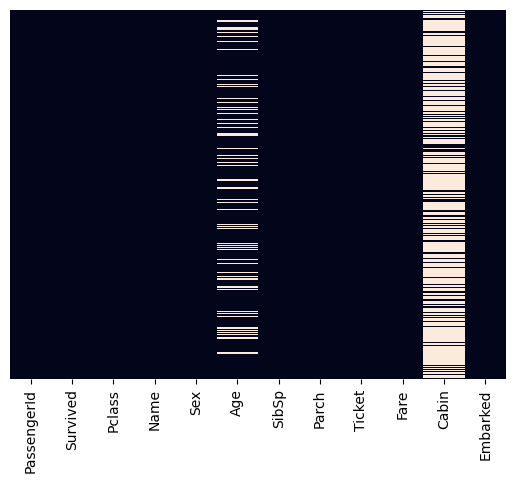

In [6]:
sns.heatmap(data.isna(),yticklabels=False ,cbar=False)

In [7]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [10]:
data.drop('Cabin' , inplace = True ,axis=1)

In [11]:
data['Embarked'] = data['Embarked'].fillna('S')

In [12]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
data.dropna(inplace=True)

In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
Sex = pd.get_dummies(data['Sex'],drop_first=True)

In [16]:
Embarked = pd.get_dummies(data['Embarked'],drop_first=True)

In [17]:
data.drop(['Sex' , 'Embarked','Name','Ticket'],axis=1,inplace=True)

In [19]:
data = pd.concat([data,Sex,Embarked],axis=1)

In [20]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [23]:
ll = LabelEncoder()
data['male'] = ll.fit_transform(data['male'])
data['Q'] = ll.fit_transform(data['Q'])
data['S'] = ll.fit_transform(data['S'])

In [24]:
ss = MinMaxScaler()
data['Fare'] = ss.fit_transform(data['Fare'].values.reshape(-1, 1))

Text(0, 0.5, 'Frequency')

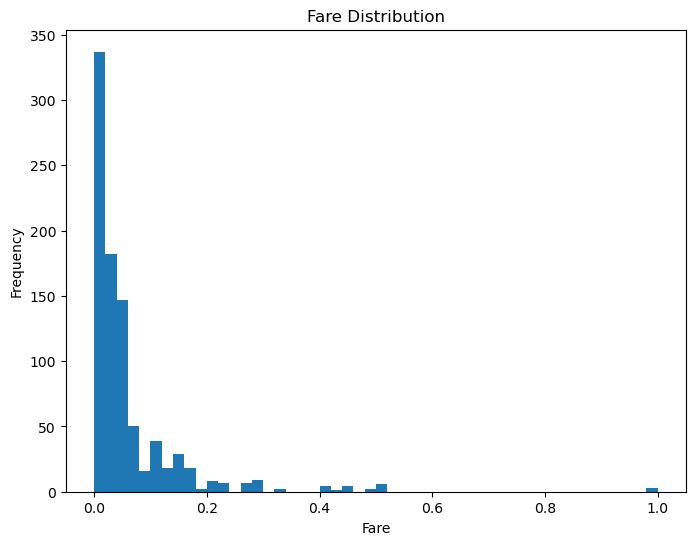

In [25]:
plt.figure(figsize=(8,6))
plt.hist(data['Fare'], bins = 50)
plt.title("Fare Distribution")
plt.xlabel('Fare')
plt.ylabel('Frequency')

In [26]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,0.014151,1,0,1
1,2,1,1,38.0,1,0,0.139136,0,0,0
2,3,1,3,26.0,0,0,0.015469,0,0,1
3,4,1,1,35.0,1,0,0.103644,0,0,1
4,5,0,3,35.0,0,0,0.015713,1,0,1


In [28]:
x = data.drop((['Survived' , 'PassengerId']) , axis = 1)
y = data['Survived']

In [29]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 ,random_state=42)

In [30]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((712, 8), (179, 8), (712,), (179,))

In [31]:
lr = LogisticRegression(random_state=42)
param_grid_lr = {
    'C' : [100,10,1.0,0.1,0.01],
    'penalty':['l1','l2']
}

lr_grid_model = GridSearchCV(lr,param_grid=param_grid_lr , scoring='accuracy' , cv= 5)
lr_grid_model.fit(x_train,y_train)
print("Best Parameters: ", lr_grid_model.best_params_)
Best_Logistic_Regression_Model = lr_grid_model.best_estimator_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best Parameters:  {'C': 1.0, 'penalty': 'l2'}


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
print("Accuracy on Training Set: {:.2f}".format(lr_grid_model.best_score_ * 100))

Accuracy on Training Set: 79.21


In [33]:
LR_Grid_Score = Best_Logistic_Regression_Model.score(x_test, y_test)
print("Accuracy By Best Logistic Regression Model:",LR_Grid_Score*100)

Accuracy By Best Logistic Regression Model: 80.44692737430168


Text(0.5, 1.0, 'Confusion Matrix For Best Logistic Regression')

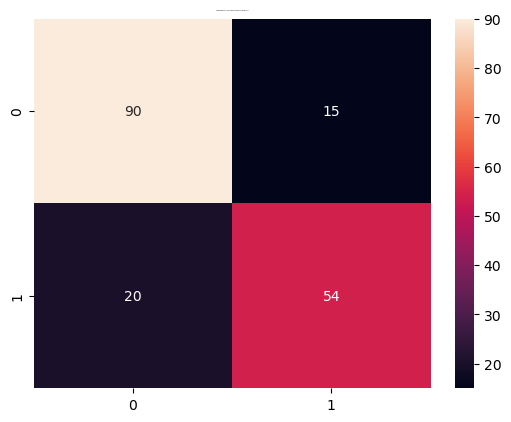

In [35]:
lr_grid_y_pred = Best_Logistic_Regression_Model.predict(x_test)
conf_matrix = confusion_matrix(y_test, lr_grid_y_pred)
sns.heatmap(conf_matrix, annot=True)
plt.title("Confusion Matrix For Best Logistic Regression", fontsize=1)